# Clustering algorithms at comparison

The Density Peak Advanced clustering algorithm: Comparison with Density Peaks, Bayesian Gaussian Mixture Model, HDBSCAN* and Spectral Clustering algorithms.

In [2]:
# Package import
import io
import sys
from Pipeline import DPA
from Examples.examples import example
from Examples.auxplot import *
import DP


In [5]:
# Package import

# Time control and machine version
import time
import platform
import cpuinfo

# General tools for data loading and plotting
import numpy as np
import matplotlib.pyplot as plt              

# Tools for the analysis of the topography
import scipy as sp                                
from sklearn import manifold                      
from scipy import cluster                         
from matplotlib.collections import LineCollection 

# Validation tools (NMI & Confusion matrix)
from sklearn.metrics import confusion_matrix
from IPython.display import HTML, display
import tabulate
from sklearn.metrics.cluster import normalized_mutual_info_score
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell

# Other packages (HDBSCAN* & Spectral clustering)
import hdbscan
import sklearn.cluster as cluster

%matplotlib inline
%load_ext autoreload
%autoreload 2

Specify the toy models and load them

In [6]:
paper_figures=["1","2","S2","S3","S4"]
all=[]
for i in paper_figures:
    all.append(example(i))



Set the characteristics of the clustering methods for each toy model

In [7]:
#DPA
all[0].dpa_Z=1.5
all[1].dpa_Z=3.0
all[2].dpa_Z=2.5
all[3].dpa_Z=2.5
all[4].dpa_Z=3.0
#HDBSCAN
all[0].hdbscan_min_cluster_size=30
all[1].hdbscan_min_cluster_size=5
all[2].hdbscan_min_cluster_size=5
all[3].hdbscan_min_cluster_size=50
all[4].hdbscan_min_cluster_size=150

all[0].hdbscan_min_samples=55
all[1].hdbscan_min_samples=250
all[2].hdbscan_min_samples=250
all[3].hdbscan_min_samples=20
all[4].hdbscan_min_samples=100
#SPECTRAL
all[0].spect_n_clusters=7
all[1].spect_n_clusters=2
all[2].spect_n_clusters=6
all[3].spect_n_clusters=23
all[4].spect_n_clusters=5

all[0].spect_n_neighbors=400
all[1].spect_n_neighbors=1000
all[2].spect_n_neighbors=600
all[3].spect_n_neighbors=72
all[4].spect_n_neighbors=300
# Bayesian Gaussian Mixture model
all[0].dpgmm_n_components=25
all[1].dpgmm_n_components=25
all[2].dpgmm_n_components=9
all[3].dpgmm_n_components=18
all[4].dpgmm_n_components=6

all[0].dpgmm_random_state=142
all[1].dpgmm_random_state=142
all[2].dpgmm_random_state=141
all[3].dpgmm_random_state=142
all[4].dpgmm_random_state=142

all[0].dpgmm_n_init=50
all[1].dpgmm_n_init=50
all[2].dpgmm_n_init=100
all[3].dpgmm_n_init=50
all[4].dpgmm_n_init=50

# Standard density peaks

all[0].dp_percent=2.0
all[1].dp_percent=1.0
all[2].dp_percent=1.0
all[3].dp_percent=2.0
all[4].dp_percent=2.0

all[0].dp_dens_type="exp"
all[1].dp_dens_type="exp"
all[2].dp_dens_type="exp"
all[3].dp_dens_type="exp"
all[4].dp_dens_type="exp"

all[0].dp_delta_cut=1.8
all[1].dp_delta_cut=0.2
all[2].dp_delta_cut=4.
all[3].dp_delta_cut=5.
all[4].dp_delta_cut=15

all[0].dp_dens_cut=np.exp(3.)
all[1].dp_dens_cut=np.exp(5.)
all[2].dp_dens_cut=np.exp(5.)
all[3].dp_dens_cut=np.exp(6.)
all[4].dp_dens_cut=np.exp(6.)
    

In [10]:
print (cpuinfo.get_cpu_info()['brand_raw'])
print (platform.platform())

Intel(R) Core(TM) i7-7800X CPU @ 3.50GHz
Linux-5.4.0-37-generic-x86_64-with-debian-bullseye-sid


In [11]:
for i in range (5):
    all[i].exe_dp()
    all[i].exe_dpgmm()
    all[i].exe_hdbscan()
    all[i].exe_spect()
    all[i].exe_dpa()


/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 50 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 50 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 100 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/alex/anaconda3/lib/python3.7/site-packages/sklearn/mixture/_base.py:267: ConvergenceWarning: Initialization 50 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  %

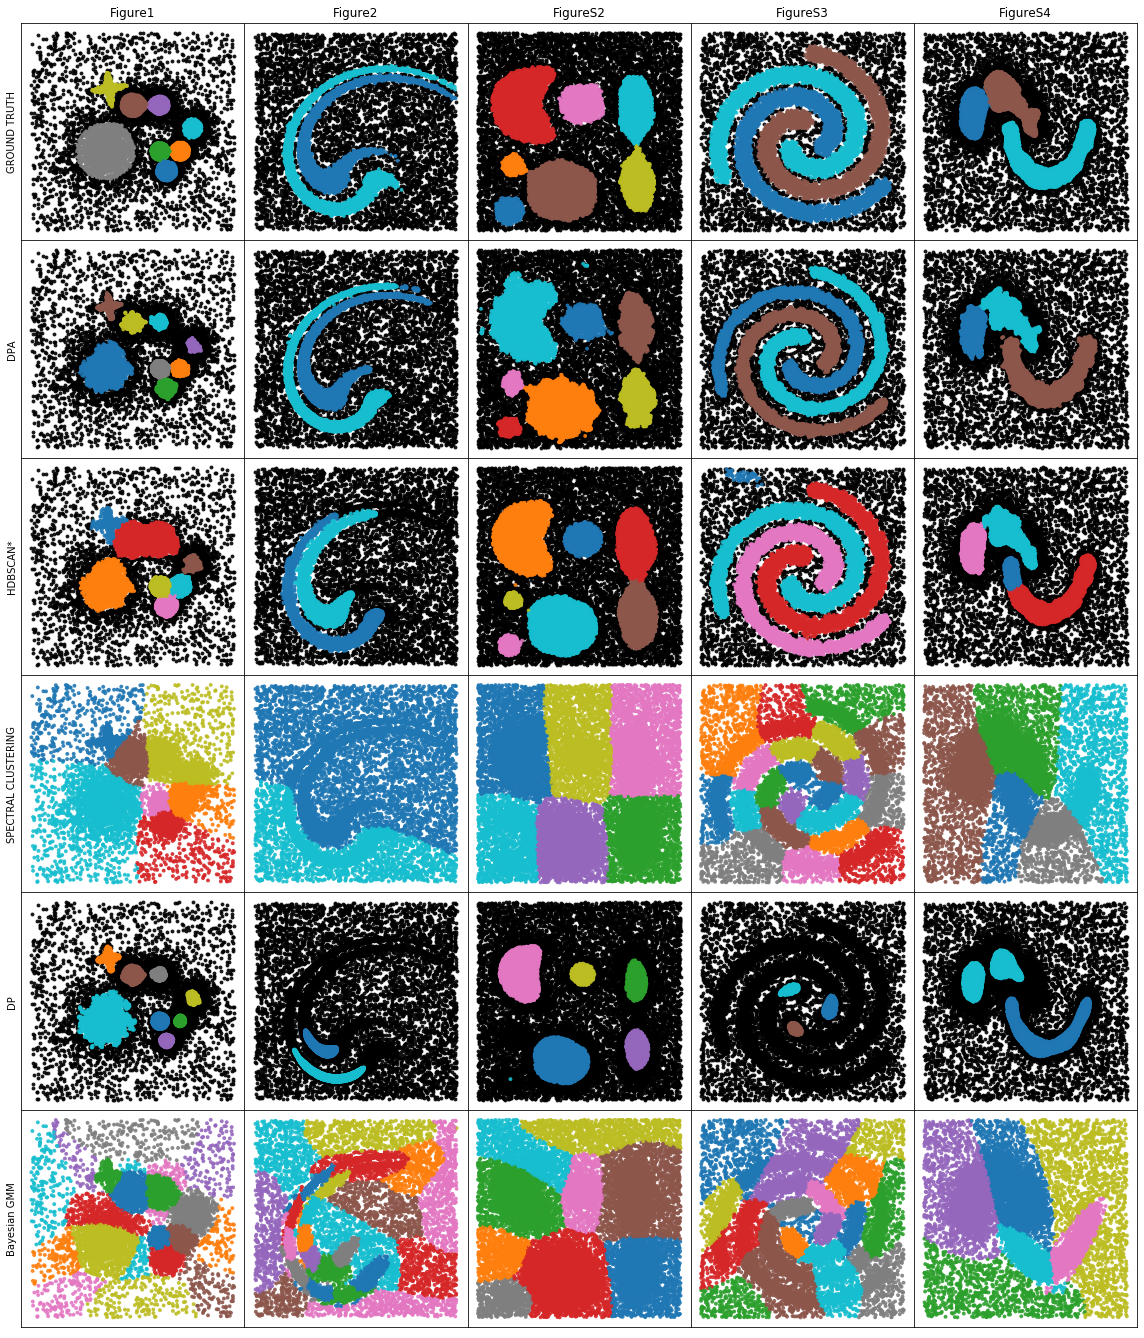

In [12]:

f, axes = plt.subplots(6, 5, figsize = (20, 24),gridspec_kw={'hspace': 0.0, 'wspace': 0})
for row in axes:
    for elem in row:
        elem.xaxis.set_major_locator(plt.NullLocator())
        elem.yaxis.set_major_locator(plt.NullLocator())

axes[0,0].set_ylabel('GROUND TRUTH')
axes[0,0].set_yticks([])
axes[1,0].set_ylabel('DPA')
axes[1,0].set_yticks([])
axes[2,0].set_ylabel('HDBSCAN*')
axes[2,0].set_yticks([])
axes[3,0].set_ylabel('SPECTRAL CLUSTERING')
axes[3,0].set_yticks([])
axes[4,0].set_ylabel('DP')
axes[4,0].set_yticks([])
axes[5,0].set_ylabel('Bayesian GMM')
axes[5,0].set_yticks([])

for i in range (5):
    axes[0,i].set_title('Figure'+all[i].name)
    axes[0,i]=plot_w_noise(axes[0,i],all[i].data,all[i].gt,-1)
    axes[1,i]=plot_w_noise(axes[1,i],all[i].data,all[i].dpa.halos_,-1)
    axes[2,i]=plot_w_noise(axes[2,i],all[i].data,all[i].hdbscan_labels,-1)
    axes[3,i]=plot_no_noise(axes[3,i],all[i].data,all[i].spect_labels)
    axes[4,i]=plot_w_noise(axes[4,i],all[i].data,all[i].dp.halo,-1)
    axes[5,i]=plot_no_noise(axes[5,i],all[i].data,all[i].dpgmm_labels)
plt.show()

DPA Topographies

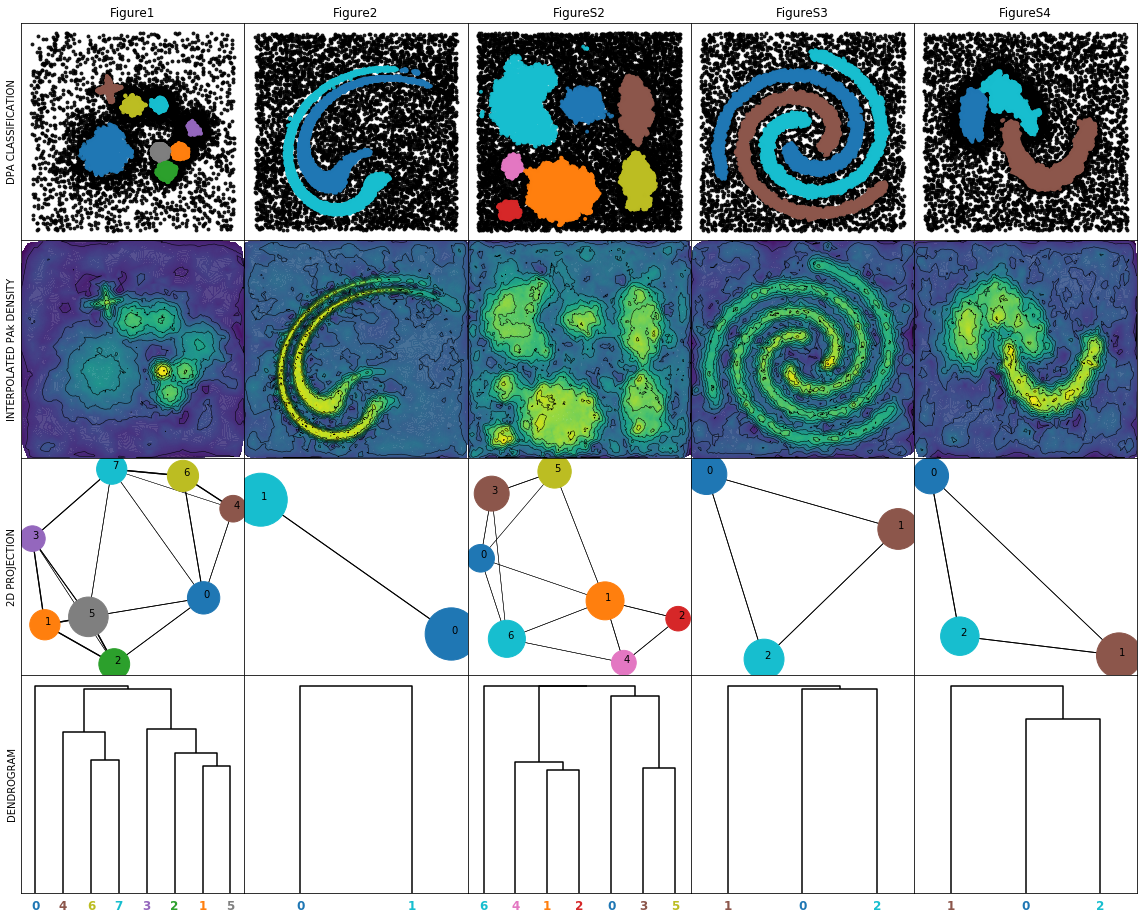

In [14]:
f, axus = plt.subplots(4, 5, figsize = (20, 16),gridspec_kw={'hspace': 0.0, 'wspace': 0})
for row in axus:
    for elem in row:
        elem.xaxis.set_major_locator(plt.NullLocator())
        elem.yaxis.set_major_locator(plt.NullLocator())

axus[0,0].set_ylabel('DPA CLASSIFICATION')
axus[0,0].set_yticks([])
axus[1,0].set_ylabel('INTERPOLATED PAk DENSITY')
axus[1,0].set_yticks([])
axus[3,0].set_ylabel('DENDROGRAM')
axus[3,0].set_yticks([])
axus[2,0].set_ylabel('2D PROJECTION')
axus[2,0].set_yticks([])
for i in range (5):
    axus[0,i].set_title('Figure'+all[i].name)
    axus[0,i]=plot_w_noise(axus[0,i],all[i].data,all[i].dpa.halos_,-1)
    axus[1,i]=plot_contour_interpolated(axus[1,i],all[i].data,all[i].dpa.densities_)
    axus[3,i],axus[2,i]=plots_topography(all[i].dpa,axus[3,i],axus[2,i])
plt.show()

In [16]:
from IPython.display import HTML, display
import pandas as pd
import tabulate
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
table_performance=[]
for i in range (5):
    dpa_nmi,dpa_FNR,DPA_FPR=get_info_noise(all[i].dpa.halos_,all[i].gt)
    hdbscan_nmi,hdbscan_FNR,hdbscan_FPR=get_info_noise(all[i].hdbscan_labels,all[i].gt)
    spect_nmi=get_info_no_noise(all[i].spect_labels,all[i].gt)
    dp_nmi,dp_FNR,DP_FPR=get_info_noise(all[i].dp.halo,all[i].gt)
    bgmm_nmi=get_info_no_noise(all[i].dpgmm_labels,all[i].gt)
    table_performance.append(["Fig. "+all[i].name,all[i].dpa_time,all[i].hdbscan_time,all[i].spect_time,all[i].dp_time,all[i].dpgmm_time,dpa_nmi,dpa_FNR,DPA_FPR,hdbscan_nmi,hdbscan_FNR,hdbscan_FPR,spect_nmi,dp_nmi,dp_FNR,DP_FPR,bgmm_nmi])
    
perform=pd.DataFrame(table_performance, columns=["   Name   ","time DPA","time HDBSCAN*","time Spectral Clustering","time density peaks","time bayesian GMM","NMI DPA","FNR DPA","FPR DPA","NMI HDBSCAN*","FNR HDBSCAN*","FPR HDBSCAN*","NMI Spectral Clustering","NMI DP","FNR DP","FPR DP","NMI Bayes GMM"])
#display(perform)
display(HTML(tabulate.tabulate(perform,floatfmt=".3f", tablefmt='html',numalign="centre",headers=perform.columns)))

,Name,time DPA,time HDBSCAN*,time Spectral Clustering,time density peaks,time bayesian GMM,NMI DPA,FNR DPA,FPR DPA,NMI HDBSCAN*,FNR HDBSCAN*,FPR HDBSCAN*,NMI Spectral Clustering,NMI DP,FNR DP,FPR DP,NMI Bayes GMM
0,Fig. 1,18.785,0.941,64.479,18.069,210.350,1.000,0.010,0.111,0.962,0.362,0.025,0.722,1.000,0.004,0.168,0.729
1,Fig. 2,35.688,1.733,753.583,58.616,413.665,0.985,0.002,0.015,0.999,0.028,0.062,0.425,1.000,0.000,0.723,0.436
2,Fig. S2,22.200,0.986,101.632,15.662,145.902,0.999,0.070,0.053,1.000,0.081,0.053,0.565,1.000,0.000,0.484,0.592
3,Fig. S3,13.584,0.348,19.129,15.972,139.855,1.000,0.000,0.100,1.000,0.040,0.018,0.450,1.000,0.000,0.903,0.356
4,Fig. S4,18.593,0.489,43.080,16.295,50.968,0.998,0.077,0.036,0.875,0.028,0.041,0.444,0.839,0.000,0.307,0.480
